In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfinv
import scipy.integrate
from iminuit import Minuit
from scipy.stats import binom
import scipy.stats


In [2]:
N_monitors = 100  #Number of monitors
null = 0.05       #Null hypothesis: faulty rate = 5%
t_cut = 9         
H1 = 0.15         #alternative hypothesis: faulty rate = 15%
x = np.arange(0,N_monitors)       


1a) The significance level is the probability to reject the null hypothesis if the null hypothesis is true. In this case the null hypothesis is that the the faulty rate of screen population is 5%. The tcut has been chosen as 9

The significance level, alpha =     0.028


(0, 30)

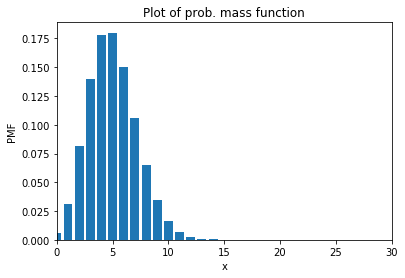

In [3]:
null_distr = binom.pmf(x,n = N_monitors,p =null)   #Probability mass function with probability from null hypothesis

#Sum to 11th element because this corresponds to 10 or more faulty monitors.
cmsum = np.sum(null_distr[t_cut+1:])                             
print("The significance level, alpha = ",'{0:8.3f}'.format(cmsum))
plt.bar(x,null_distr)
plt.title("Plot of prob. mass function")
plt.ylabel("PMF")
plt.xlabel("x")
plt.xlim(0,30)



2.8% of the time we will observe 9 or more faulty monitors given that the null hypothesis is true and there are 100 monitors

Beta =     0.055  , (5.5% chance of a false negative)


(0, 30)

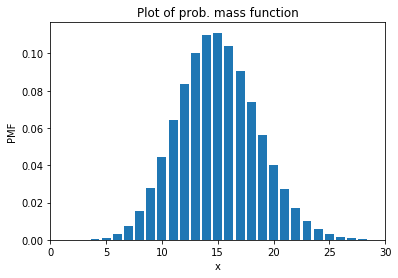

In [4]:
#1b)

H1_distr = binom.pmf(x,n = N_monitors,p =H1) #probability mass function with alternative hypothis probability

cmsumH1 = np.sum(H1_distr[:t_cut+1])         #sum to 10th index as this includes 9 monitors or fewer faulty monitors
print("Beta = ",'{0:8.3f}'.format(cmsumH1)," , (5.5% chance of a false negative)")
plt.bar(x,H1_distr)
plt.title("Plot of prob. mass function")
plt.ylabel("PMF")
plt.xlabel("x")
plt.xlim(0,30)

In [5]:
#2a)

#Define Gaussian class to model signal distribution          
class Gaussian():
    def __init__(self,mean,sigma):
     
        self.mean = mean
        self.sigma = sigma
        
     
    
    #Method that evalutates Gaussian function
    def evaluate(self,x):
        return 1/(self.sigma*np.sqrt(2*np.pi))*np.exp((-1/2)*((x-self.mean)/self.sigma)**2)  #Equation for gaussian
    
   #Method to integrate function above or below cutoff depending on input parameters a,b
    def integral(self,a,b):
    
        integral = scipy.integrate.quad(self.evaluate,a,b)
        
        return integral
    

        
#Define class for ROC curves 
class ROC():
    def __init__(self,sig,p,tcut,tp,tk):
        self.alpha = []
        self.beta = []
        self.p = p
        self.sig = sig
        self.tcut = tcut
        self.tp = tp                          #define Pion time
        self.tk = tk                          #Intitialise Kaon time
        self.gaussianp = Gaussian(tp,sig)
        self.gaussiank = Gaussian(tk,sig)
        
    #Method to calculate alpha beta pairs of ToF performance  
    def pair(self,t):
        #For beta integrate Kaon Gaussian up to cutoff
        beta = self.gaussiank.integral((self.tp - 6*self.sig),t)  #integrate from 6 sigma below mean
        #For alpha integrate Pion Gaussian above cutoff
        alpha = self.gaussianp.integral(t,self.tk+6*self.sig)     #integrate to 6 sigma above mean
        return alpha[0],beta[0]
    
        
    
    
        
        

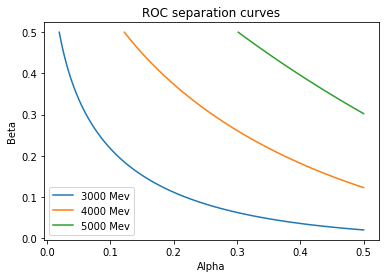

In [6]:
#Function to calculate ToF from mass and momentum
def time(p,m):
    L = 20
    c = 3*10**8
    return (L/c) * np.sqrt(1+(m/p)**2)

def performance():
    N_points = 100
    sig = 400 * 10**(-12)
    mk = 493.7
    mp = 139.6
    #xval  = 6.669*10**(-8)  #arbitrary
    pvals = [3000,4000,6000]          #Momentums in MEV
    
    #Iterate through momentum values and calculate the corresponding ToFs, alphas and betas
    for j in pvals:

        tk = time(j,mk)
        tp = time(j,mp)
        #Create array of evenly spaced threshold values between Pion and Kaon ToFs
        tcut_arr= np.linspace(tp,tk,100)   

        alpha_vals = []
        beta_vals = []
        
        #Create ROC curve object for corresponding momentum
        ROCcurve1 = ROC(sig,j,tcut_arr,tp,tk)

        
        for i in range(N_points): 
            #Call pair method to calculate alpha and beta values for each threshold
            alpha_vals.append((ROCcurve1.pair(tcut_arr[i])[0]))
            beta_vals.append((ROCcurve1.pair(tcut_arr[i])[1]))

        plt.plot(alpha_vals,beta_vals)
        plt.legend(["3000 Mev", "4000 Mev", "5000 Mev"])
        plt.title("ROC separation curves")
        plt.xlabel("Alpha")
        plt.ylabel("Beta")

performance()
    


3000MeV gives the best performane. This is due to low Beta corresponding to high alpha and high beta values correspnding to low alpha values. So for small alpha, it has very large beta. This means one can easily distinguish between the alpha and beta values.

Alpha is the type 1 error (false positive) while beta is the type 2 error (false negtive). These values are related for a given test statistic.

In [7]:
#Q3 

In [8]:
%matplotlib inline

total # of events = 43.0 # of bins= 50


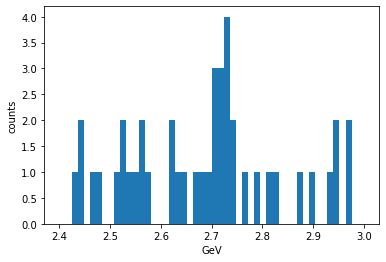

In [9]:
nbins = 50
XMIN = 2.4
XMAX = 3.0
bins = np.linspace(XMIN,XMAX,nbins)
counts = np . array ([0 , 0, 1, 2, 0, 1 , 1 , 0 , 0 , 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 1, 1,
0, 1, 1, 1, 3, 3, 4, 2, 0, 1 , 0 , 1 , 0 , 1, 1, 0, 0, 0, 1, 0, 1, 0,
0, 1, 2, 0, 2, 0, 0]). astype ( float )

tot = 0
for i in counts:
    tot += i
    
print("total # of events =",tot, "# of bins=",len(counts))
plt.hist(bins,bins = len(counts),weights = counts, range = (min(bins), max(bins)))
plt.ylabel("counts")
plt.xlabel("GeV")
plt.show()

In [10]:
#3a)
avg_bgk = tot/len(counts)    #np.mean(counts)
print("average number of background events per bin = ", avg_bgk)

average number of background events per bin =  0.86


In [11]:
#3b)

peak = np.argmax(counts)          #Index of peak counts
width = (XMAX-XMIN)/len(counts)   #Width of each bin
#width = 0.012
peak_GEV = XMIN + peak*width + width/2   #middle of bin of peak counts
print("location of peak = ", peak_GEV,"GeV")

location of peak =  2.73 GeV


In [12]:
#3c)

N_obs = np.sum(counts[peak-2:peak+3])     #summation of 5 bin window around peak
print((counts[peak-2:peak+3]))
print("Total number of events = ", N_obs)

[3. 3. 4. 2. 0.]
Total number of events =  12.0


In [13]:
#3d)

expected_bkg1= 5 *avg_bgk
print("Expected background events in window (assuming all events are background): ",'{0:8.2f}'.format(expected_bkg1))

#excluding peak window from background event summation
bkg_avg = (np.sum(counts[:peak-2])+np.sum(counts[peak+3:] ))/(len(counts)-5)
expected_bkg2 =bkg_avg*5
print("Expected background events(excluding peak window): ",'{0:8.2f}'.format(expected_bkg2))


Expected background events in window (assuming all events are background):      4.30
Expected background events(excluding peak window):      3.44


In [14]:
from scipy.stats import poisson
#Use survival fn to calculate pvalue
pvalue = poisson.sf(12,expected_bkg1)  #survival fn = 1 - cumulative distr. function

#convert pvalue to standard deviations
sigmas = scipy.special.erfinv(1 - pvalue) * np.sqrt(2)

print('{0:8.3f}'.format(sigmas),"sigmas")

   3.463 sigmas


In [15]:
#Class that describes flat background
class Flat():
    def __init__(self,intercept,XMIN, XMAX):                 
        self.intercept = intercept          
        self.XMIN = XMIN 
        self.XMAX = XMAX
    
    #Method that evalutates linear function
    
    def evaluate (self,counts):
        return self.intercept   #linear equation

#Class that describes hypothetical signal
class Gauss():
    def __init__(self,mean,sigma):
        
        self.mean = mean
        self.sigma = sigma
       
    #Method that evalutates Gaussian function
    def evaluate(self,x):
       
        return (1/(self.sigma*np.sqrt(2*np.pi)))*np.exp((-1/2)*((x-self.mean)**2/(self.sigma)**2))  #Equation for gaussian
  


In [16]:
#evaluate flat function
def h0_flat(y0):
    norm_flat = scipy.integrate.quad(Flat(y0,XMIN,XMAX).evaluate,XMIN,XMAX)[0]   #normalisation factor
    return Flat(y0,XMIN,XMAX).evaluate(counts)

#evlutate combined gaussian + flate function with a fractional component, f.
def h1(y0,mean,f):
    sigma = 12/1000 
    #normalisation factors
    norm_gauss= scipy.integrate.quad(Gauss(mean,sigma).evaluate,XMIN,XMAX)[0] 
    norm_flat = scipy.integrate.quad(Flat(y0,XMIN,XMAX).evaluate,XMIN,XMAX)[0]
    
    #Conditions to avoid division by 0
    if norm_gauss == 0:
        norm_gauss = 10**(-10)
    if norm_flat == 0:
        norm_flat = 10**(-10)
     
    return f*Gauss(mean,sigma).evaluate(counts)/norm_gauss+(1-f)*Flat(y0,XMIN,XMAX).evaluate(counts)

#flat distribution chi squared function
def h0_chi2(y0):
    N_obs = counts                 #observed events
    N_obs[N_obs == 0] = 10**(-10)  
   
   
    N_exp = h0_flat(y0)            #call h0_flat function to calculate expected events
    if N_exp == 0:
        N_exp = 10**(-10)
   
    return 2*np.sum(N_exp - N_obs + N_obs*np.log(N_obs/N_exp))

#Combined flat + gaussin chi squared function
def h1_chi2(y0,mean,f):
    sigma = 12/1000
    N_obs = counts                  
    N_obs[N_obs == 0] = 10**(-10)  
    N_exp = h1(y0,mean, f)
    N_exp[N_exp == 0] = 10**(-10) 
    
    
   
    return 2*np.sum(N_exp -N_obs + N_obs*np.log(N_obs/N_exp))

    
    
    

In [17]:
def run_minim(min_func):
    params = ['y0']                        #set parameters to be calculated
    #Setting values to start at and estimated errors. 
    startvals = {params[0] : 0.83}           
    theMinuit = Minuit(h0_chi2, **startvals)              #run Minuit optimiser with with NLL function.
    theMinuit.errors=[0.1]                          #Errors on initial start value
    
    #Nll increases by 0.5 when you go to either side of the minimum by one unit error on the parameter
    theMinuit.errordef=1.0                     #Set errordef to 0.5 since this a log-likelihood function

    #Run the minimisation
    result = theMinuit.migrad()
    return params, theMinuit


paramsh0,theMinuith0 = run_minim(h0_chi2)
valuesh0= theMinuith0.values

#h0_vals =h0_chi2(valuesh0[0])

#print ("\nMinuit Results ")
#showIminuitResult( paramsh0, theMinuith0)  #call function that outputs results
 


C:\Users\Theo\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in log
C:\Users\Theo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Theo\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, 'PDF')

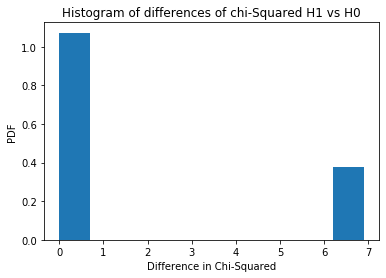

In [18]:
diff_chi2 = []
h0_vals  = []
h1_vals = []
width = (12/1000)
#Iterate through bins and set 'mean' parameter to the centre of the corresponding bin then carry out
#minimisation 
for i in range(len(counts)):
    params = ['y0','mean','f']                        #set parameters to be calculated
    #Setting values to start at and estimated errors.
    
    startvals = {params[0] : 0.83,params[1] : XMIN+(width/2)+i*width, params[2] : 0.1}  
    theMinuit = Minuit(h1_chi2, **startvals)              #run Minuit optimiser with with Chi-2 function.
    theMinuit.errors=[0.1,0.1,0.1 ]                       #Errors on initial start value
     
    
    theMinuit.errordef=1.0                     #Set errordef to 1.0 for chi squared minimisation
    #Run the minimisation
    result = theMinuit.migrad()
    

   
    valuesh1= theMinuit.values
    
                     
    h1_val =h1_chi2(valuesh1[0],valuesh1[1],valuesh1[2])
    
    h0_val =h0_chi2(valuesh0[0])
    diff = h0_val - h1_val                   #Calculate difference in chi-squared valeues
    h0_vals.append(h0_val)
    h1_vals.append(h1_val)
    diff_chi2.append(diff)

plt.hist(diff_chi2,density = True)  #Plot histogram of difference in chi-squared
plt.title("Histogram of differences of chi-Squared H1 vs H0")
plt.xlabel("Difference in Chi-Squared")
plt.ylabel("PDF")
#Plotting h0 chi-squared,h1 chisquared and the difference for debugging
#plt.plot(h0_vals, label = "h0")
#plt.plot(h1_vals, label = "h1")
#plt.plot(diff_chi2, label = "diff")
#plt.legend()





In [19]:
maxval = np.amax(diff_chi2) #Calculate maximum difference in chi squared
print("Maximum chi-2 difference =", '{0:8.2f}'.format(maxval))
#Calculates p value of test stat using 1 degree of freedom 

p_val = scipy.stats.chi2.sf(maxval,2)           #2 degrees of freedom between H0 and H1
print('The p-value is:','{0:8.2f}'.format(p_val) )

nsigs = erfinv (1 - p_val ) *np.sqrt(2)
print("The Z-score is ",'{0:8.2f}'.format(nsigs))

Maximum chi-2 difference =     6.89
The p-value is:     0.03
The Z-score is      2.15


Here we expect a large Chi-Squared difference when there is a lot of deviation, ie the signal deviates a lot from the background. In such cases the background hypothesis cannot accurately model the the signal . When the chi-squared difference is small, the signal does not deviate much from the background which shows that the alternative hypothesis H1 does not contribute anything to the null hypothesis.